In [7]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy import stats
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

### Импорт данных

In [8]:
data = pd.read_csv("Data.csv")
submission = pd.read_csv("Submission.csv")

In [9]:
submission

,idx,label
0,0,2
1,1,0
2,2,0
3,3,0
4,4,1
...,...,...
19028,19915,0
19029,19916,0
19030,19917,0
19031,19918,0


In [10]:
data

,idx,Признак 1,Признак 2,Признак 3,Признак 4,Признак 5
0,0,-0.179369,-0.013356,0.016641,-0.325923,-0.031094
1,1,-0.157893,-0.010647,0.002895,-0.332016,-0.012547
2,2,-0.249451,-0.011700,-0.001435,-0.487909,-0.005343
3,3,-0.158938,0.210980,0.021905,-0.334196,-0.013976
4,4,-0.687836,0.422630,0.054028,0.719132,-0.038392
...,...,...,...,...,...,...
19028,19915,-0.600084,-0.011454,-0.024991,0.700872,0.018778
19029,19916,-0.081612,-0.001023,-0.045937,-0.353670,0.053334
19030,19917,-0.028544,0.002083,-0.048065,-0.493040,0.062817
19031,19918,-0.089021,-0.000809,-0.047366,-0.354547,0.053598


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19033 entries, 0 to 19032
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   idx        19033 non-null  int64  
 1   Признак 1  19033 non-null  float64
 2   Признак 2  19033 non-null  float64
 3   Признак 3  19033 non-null  float64
 4   Признак 4  19033 non-null  float64
 5   Признак 5  19033 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 892.3 KB


#### Анализ признаков и выбор подходящих

In [12]:
from sklearn.cluster import KMeans
from sklearn import metrics

 Переберем признаки и выберем те, которые подходят для класстеризации

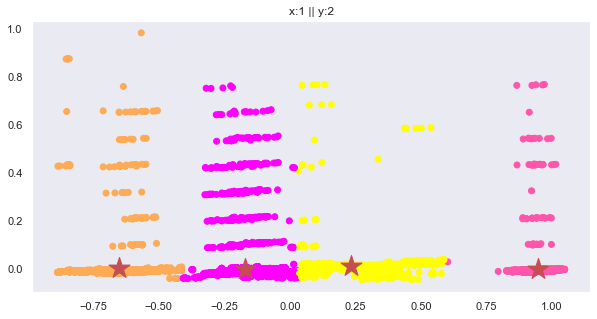

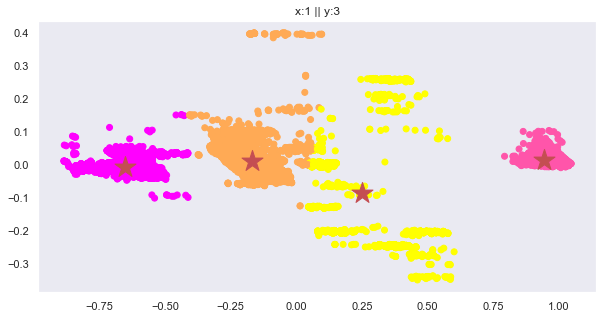

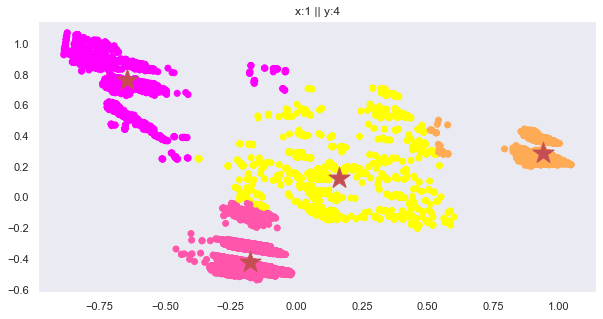

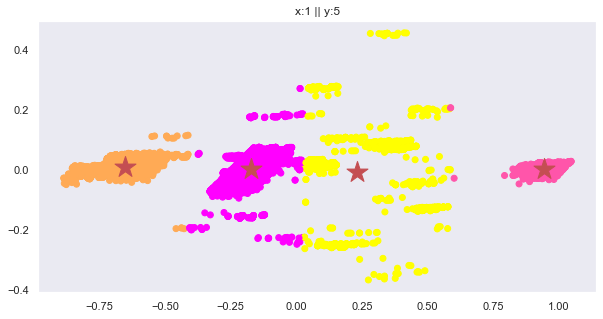

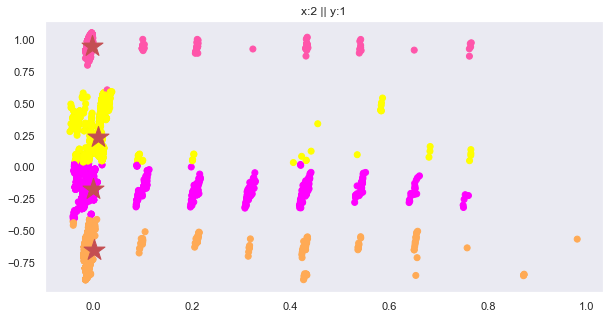

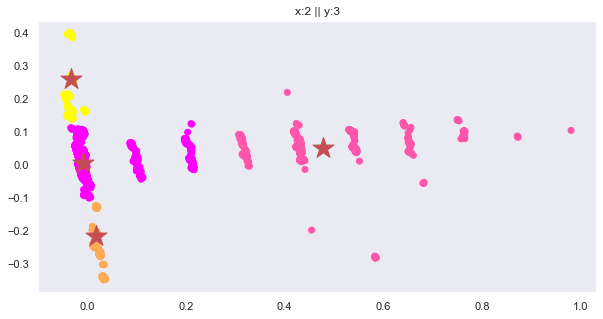

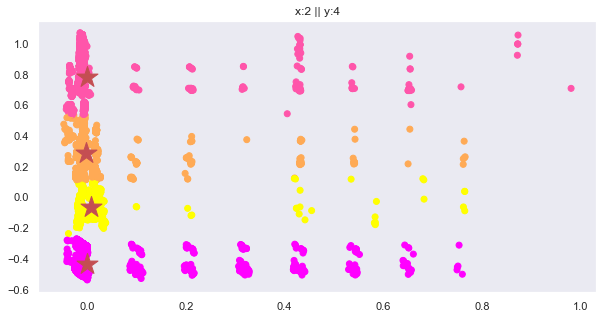

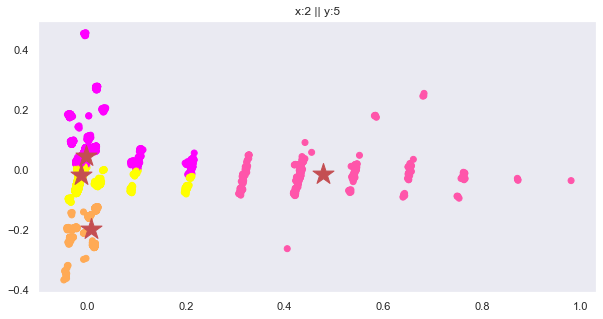

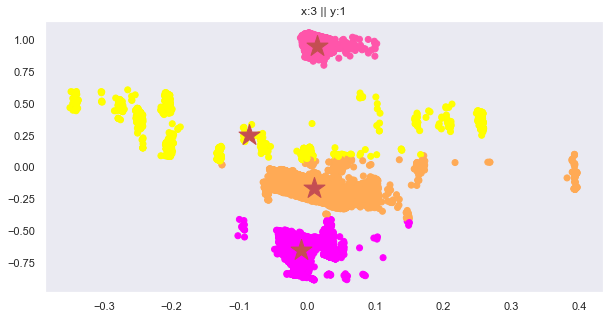

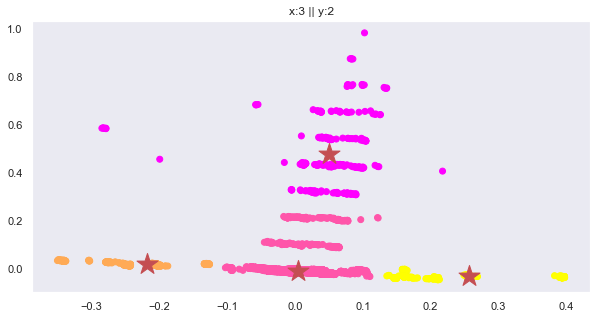

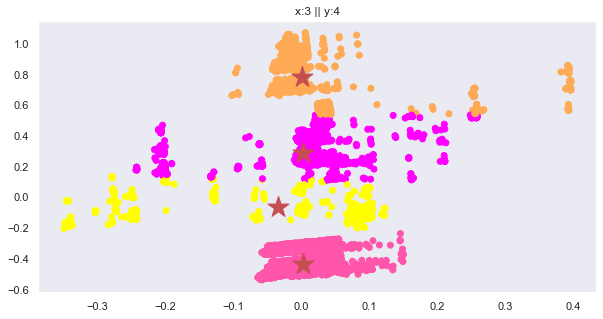

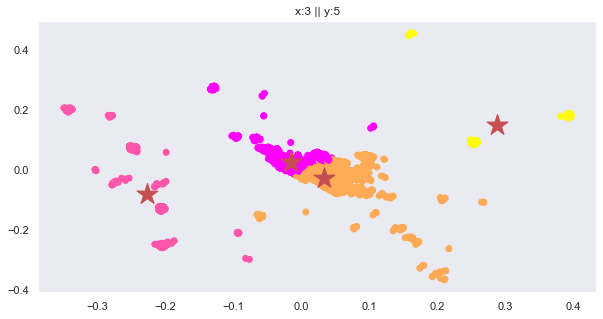

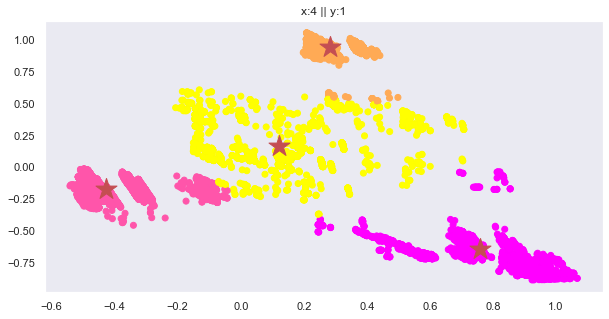

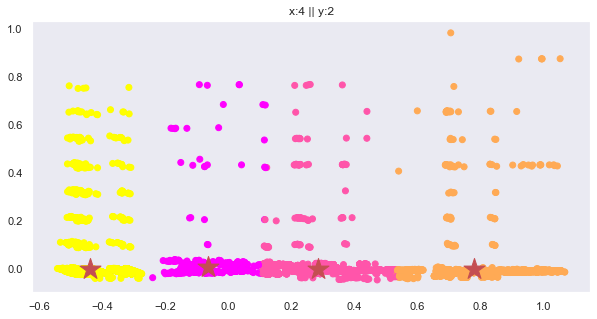

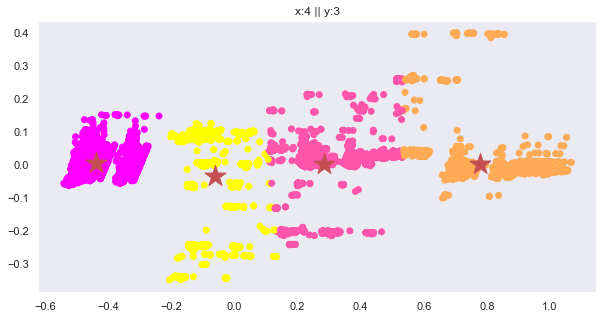

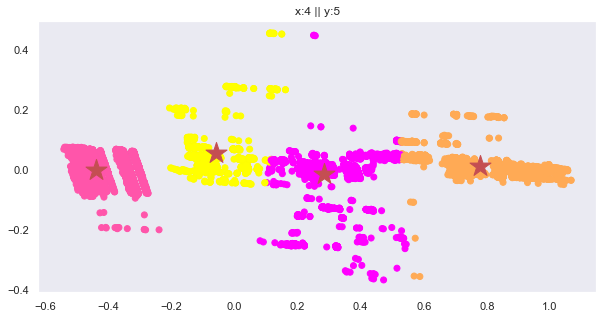

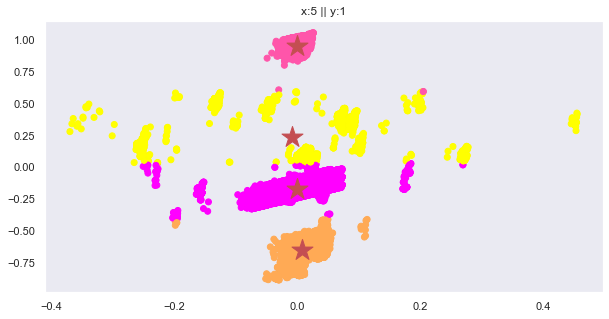

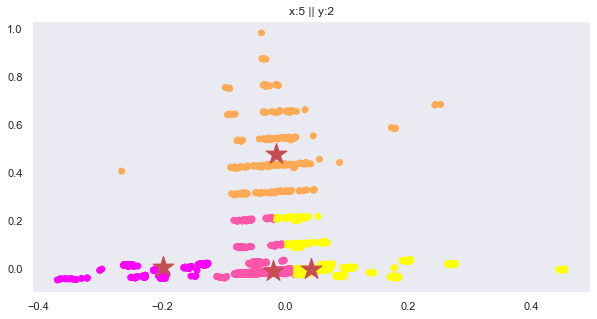

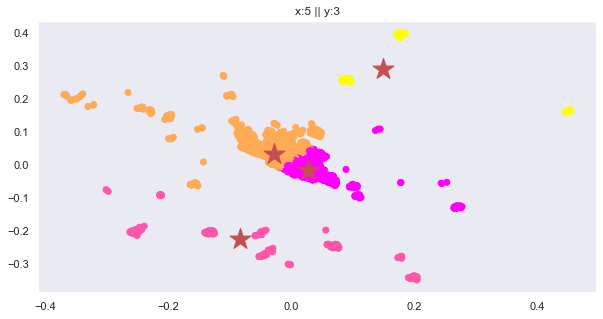

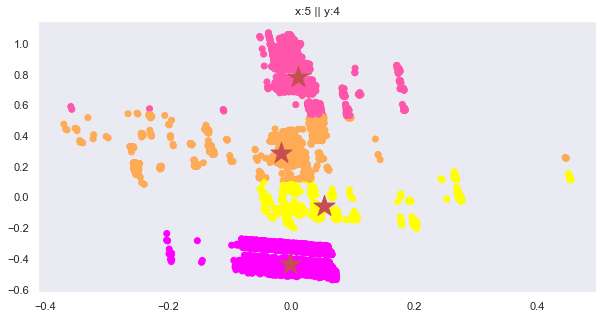

In [52]:
for i in range(1, 6): 
    for j in range(1, 6): 
        if i!=j: 
            coord_x =  i  
            coord_y = j  
            k = 4 
 
            X_cluster = data.loc[:,['Признак '+str(coord_x), 'Признак '+str(coord_y)]].values 
 
            km = KMeans(n_clusters=k) 
            km.fit(X_cluster) 
            centroids = km.cluster_centers_ 
            labels = km.fit_predict(X_cluster) 
            label_centroids = km.fit_predict(centroids) 
            title = "x:" +str(coord_x) + ' || y:' +str(coord_y) 
            plt.figure(figsize=(10, 5)) 
            plt.title(title) 
            plt.scatter(X_cluster[:, 0], X_cluster[:, 1],cmap= "spring", c=labels) 
            plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=490) 
            plt.grid();

#### Выберем признаки, которые лучше всего подходят для класстеризации - Признак 1, Признак 4

In [29]:
X_cluster = data[["Признак 1", "Признак 4"]]

#### Подберем число класстеров 

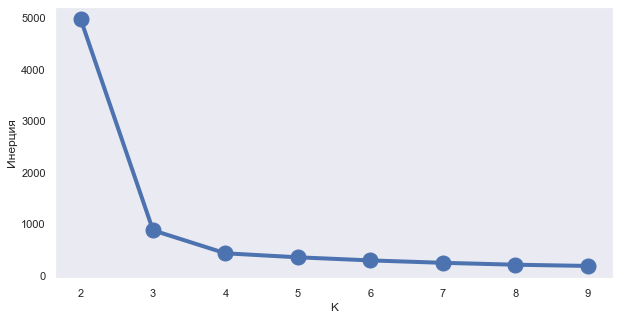

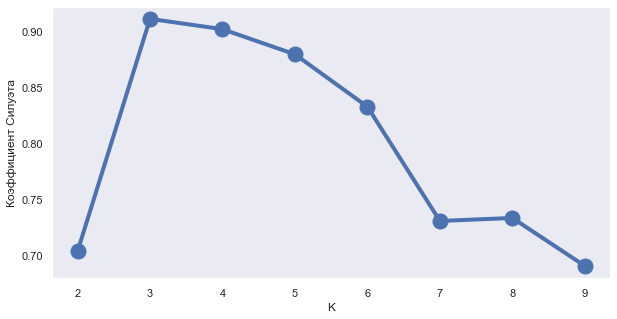

In [30]:
sse = []
sil_scor = []
list_k = list(range(2, 10))
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_cluster)
    sse.append(km.inertia_)
    labels = km.fit_predict(X_cluster)
    sil_scor.append(metrics.silhouette_score(X_cluster, labels, metric='sqeuclidean'))

plt.figure(figsize=(10, 5))
plt.plot(list_k, sse, '-o',linewidth=4, markersize=15)
plt.grid()
plt.xlabel('K')
plt.ylabel('Инерция');
plt.figure(figsize=(10, 5))
plt.plot(list_k, sil_scor, '-o',linewidth=4, markersize=15)
plt.grid()
plt.xlabel('K')
plt.ylabel('Коэффициент Силуэта');

Возьмем число класстеров - 4

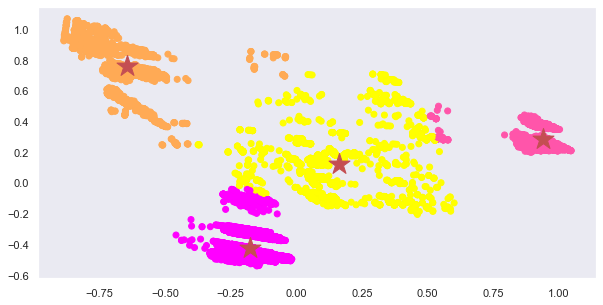

In [33]:
cord_x =  1
cord_y = 4
## Число Кластеров
k = 4 

X_cluster = data.loc[:,['Признак '+str(cord_x), 'Признак '+str(cord_y)]].values

km = KMeans(n_clusters=k)
km.fit(X_cluster)
centroids = km.cluster_centers_
labels = km.fit_predict(X_cluster)
label_centroids = km.fit_predict(centroids)

plt.figure(figsize=(10, 5))
plt.scatter(X_cluster[:, 0], X_cluster[:, 1], cmap= "spring", c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=490)
plt.grid();

#### Submission 

In [44]:
idx = data["idx"]

In [45]:
submission = pd.DataFrame(idx)

In [46]:
submission["label"] = labels

In [47]:
submission["label"].value_counts()

0    9576
1    3917
2    3599
3    1941
Name: label, dtype: int64

In [48]:
submission

,idx,label
0,0,0
1,1,0
2,2,0
3,3,0
4,4,2
...,...,...
19028,19915,2
19029,19916,0
19030,19917,0
19031,19918,0


Сохраним данные

In [49]:
submission.to_csv('My_Submission1.csv',index=False)